In [0]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import numpy as np
import pandas as pd


In [0]:

data = pd.read_csv('sheet1.csv')
data1 = data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4',	'Unnamed: 5'],axis=1)
data2 = data1.drop(index=[0])
data3 = data2.rename(columns={'Unnamed: 0':'Sr Number:','Unnamed: 1':'Captured Date and Time','Unnamed: 6':'Active Energy(kWh) Import',\
                     'Unnamed: 7':'Active Energy(kWh) Export','Unnamed: 8':'Apparent Energy(kVAh)	Import','Unnamed: 9':'Apparent Energy(kVAh)	Export',\
                     'Unnamed: 10':'Average Voltage(V)','Unnamed: 11':'Average Current(A)','Unnamed: 12':'Neutral Current(A)','Unnamed: 13':'Status Byte'})
data4 = data3.drop(index=[1,2,3])
data5 = data4
data5.head()
data5['Average Current(A)'] = data5['Average Current(A)'].astype('float64')
data5['Average Voltage(V)'] = data5['Average Voltage(V)'].astype('float64')
data5['Average Power'] = (data5['Average Current(A)']*data5['Average Voltage(V)']).astype('float64')
data5[['Captured Date and Time', 'Average Power']].head()
data6 =  data5[['Captured Date and Time','Average Power']].rename(columns= {'Average Power': 'feature_1'})
data6['Captured Date and Time'] = data6['Captured Date and Time'].astype('datetime64')
data6['Captured Date and Time'] = data6['Captured Date and Time'].astype('int64')
d1 = data6[:96]
d2 = data6[96:192]
dd1 = np.array(d1['feature_1'])
l = list(dd1)
sd1 = np.arange(0, 1, (1/96))
l2 = list(sd1)
l = np.append(l,l2)
dd2 = np.array(l.reshape(96,2))
dd2.shape

(96, 2)

In [0]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.5)
clf.fit(dd2)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.5, kernel='rbf',
            max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

In [0]:
l = clf.predict(dd2)
print('normal data(higher than theta, here 0)', sum(l) / len(l))
# l

0.5625


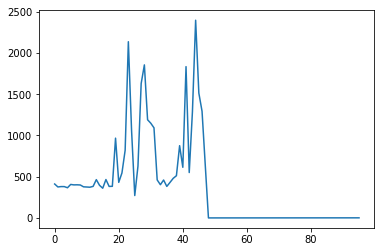

In [0]:
plt.plot(dd2[:,0])
plt.legend('Normal user activity')
plt.show()

In [0]:
ran = 10*np.random.randint(0,100, size=(96,1))
ran = dd2+ran
l = clf.predict(ran)
print( 'Outlier Data', sum(l) / len(l))
plt.legend('Anomaly activity')

if((sum(l) / len(l)) < -0.9):
  print('anomaly detected raise alert')
# l

-1.0
anomaly detected raise alert


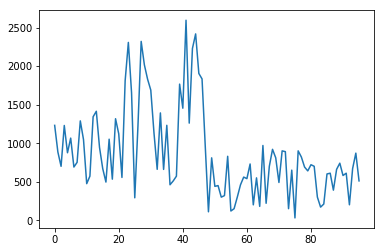

In [0]:
plt.plot(ran[:,0])
plt.show()
